In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
from __future__ import division
import matplotlib as mpl
import pandas as pd
import sys
import community
# sys.path.append("/data-01/MFCGD.COM/mittadi/.conda/envs/coop/bin/")
print(sys.executable)
from operator import itemgetter
#very important to install community using pip install --user community
# and then pip install --user python-louvain==0.5
#Note: import community    community.best_partition(G)  this will not work...there is a lot of ambiguity..
from community import community_louvain
import csv
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import re
import numpy as np
import pandas as pd
import sys
print(sys.executable)
import pandas as pd
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# from symspellpy.symspellpy import SymSpell, Verbosity
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import logging
import os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
pd.set_option('display.max_columns', 136)
pd.set_option('display.max_colwidth', -1)
from nltk.corpus import stopwords, names
import re, unicodedata
from nltk.corpus import names

/usr/local/share/anaconda/anaconda3-5.0.1/bin/python
[nltk_data] Downloading package stopwords to
[nltk_data]     /data-01/MFCGD.COM/mittadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/share/anaconda/anaconda3-5.0.1/bin/python


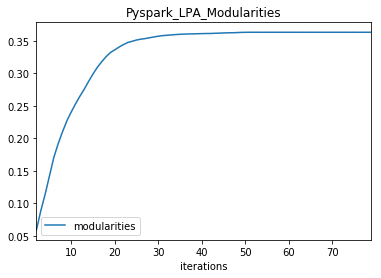

In [2]:
%matplotlib inline
# modularities = pd.DataFrame({'iterations': [2,3,4,5,6,7,8,9,10,11], 'modularities':[0.0152,0.0176,0.0193,0.0212,0.0204,0.0197,0.0188,0.0167,0.0161,0.0157]})
# modularities.to_csv("/data-01/MFCGD.COM/mittadi/stack_overflow/modularities.csv",index=False)
modularities=pd.read_csv('modularities.csv', index_col = False)
modularities=modularities[['iterations','modularities']]
modularities.plot(x='iterations', y='modularities',title='Pyspark_LPA_Modularities')
# modularities.head(50)

Mean community size is  62


/data-01/MFCGD.COM/mittadi/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'community sizes')

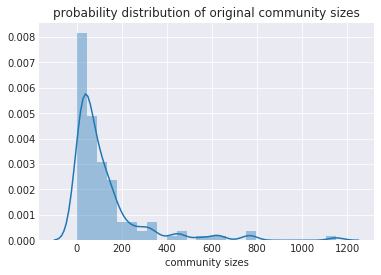

In [3]:
                                            #PROBABILITY DISTRIBUTION OF COMMUNITY SIZES

#community_detection analytics
communities=pd.read_csv('communities.csv', index_col = False)
communities.shape
communities.head(n=10)
# communities.loc[communities['id']==1271.0,'sub_department_name'].iloc[0]

def to_set(x):
    return set(x)

ee = communities.groupby(['label']).agg({'id':'count','id':to_set})
# ee=ee['id'].value_counts()
# ee['index1'] = ee.index
# print("Some departments that have been identified as isolated communities:\n")
# print(communities.loc[communities['id']==1271.0,'sub_department_name'].iloc[0])
# print(communities.loc[communities['id']==1151.0,'sub_department_name'].iloc[0])
# print(communities.loc[communities['id']==1258.0,'sub_department_name'].iloc[0])
# print(communities.loc[communities['id']==1100.0,'sub_department_name'].iloc[0])

ee.head(20)

ee = communities.groupby(['label']).agg({'id':'count'})
ee=ee['id'].value_counts().reset_index()
ee = ee.drop('id', 1)
ee=ee.rename(index=str, columns={"index": "community_size"})

# print(sum(n < 0 for n in ee.values.flatten())) #prints number of negative values in dataframe

#number of vertices: 162771
#mean
q = ee["community_size"].quantile(0.80)  #enter the percentile as parameter
qq=ee[ee["community_size"] < q]
print("Mean community size is ",round(qq["community_size"].mean()))
#

%matplotlib inline

#plot from pandas inbuilt api
# ax = ee.plot.kde()  #probability distribution of original dataframe
# ax = qq.plot.kde()  #after outlier removal

#plot using seaborn
import seaborn as sns
sns.set_style('darkgrid')
ax=sns.distplot(list(ee.community_size))
ax.set_title('probability distribution of original community sizes')
ax.set_xlabel('community sizes')

/data-01/MFCGD.COM/mittadi/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'community sizes')

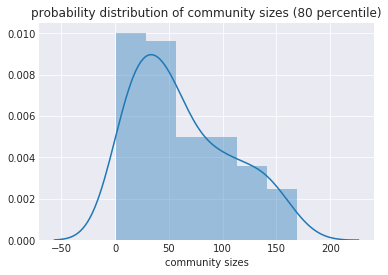

In [4]:
ax=sns.distplot(list(qq.community_size))
ax.set_title('probability distribution of community sizes (80 percentile)')
ax.set_xlabel('community sizes')

In [5]:
                                                    #COMMUNITIES WITH THEIR SIZES
check=pd.read_csv('check.csv', index_col = False) 
check.head()

,label,count
0,7930,1150
1,17443,774
2,15711,758
3,16701,631
4,15724,617


In [6]:
#provide the communtiy
comm=15711

In [7]:
                                                    #READING THE DATA
df=pd.read_csv('community_'+str(comm)+'_clean.csv', index_col = False)
df=df.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
df = df.dropna(subset=['body']).reset_index(drop=True)#drop rows where col value is nan
df = df.loc[df['body']!=' '].reset_index(drop=True)
df = df.loc[df['body']!=''].reset_index(drop=True)
# print(df[df["body"].isnull()])   #this statement will return null now because we have already dropped null/nan values
print("loaded")
# df.head()
df.shape   #TFIDF initialization does not hangs till 24000 emails


loaded


(11331, 27)

In [13]:
# subjects=df.groupby('subject').count().reset_index()
# subjects.head(100)

In [6]:
                                #slice dataframe here to prevent it hanging the jupyter notebook
df=df.head(5000)

'the following status is being provided so everyone can understand what has been done to date and what is remaining if you have any questions do not hesitate to discuss with us thank you what has happened since the last status action items from meeting with pilar and jm project will find an alternative to a local drive local server drive  it team suggested personal drives in citrix or vdi ensure solution would work for everyone project will research and come up with a plan for the  different domains that will be accessed at the same time  project team still researching more transparency around information with jm  set up meeting with jm to discuss issues raised  done sent wyse deployment plan for validation and update from the managers what is expected next week decision and update on action items wyse deployment validation done what are the key milestones that are remaining roll out the wyse tos terminals complete signoffs potential deferrals  clean ups  people using group laptop iden

In [ ]:
                                                        #TESTING
#checking, how the cleaning results are
df.ix[46,'body']
df.ix[146,'body']
df.ix[246,'body']
df.ix[346,'body']
df.ix[546,'body']
df.ix[46,'body']

In [7]:
                                                # BASIC TEXT CLEANING USING GENSIM MODULE

data = list(df['body'])


print(data[43])

#just to confirm if the things are good
# for x in data:
#     s = re.search(r"x{3,10}", x)
#     print(s)

# saved=df.ix[0:10000,"body"]
# saved.to_csv("/data-01/MFCGD.COM/mittadi/office_365_spark/archive_emails/saved.csv",index=False)



pprint(data[:1])

def sent_to_words(sentences):
    for sentence in sentences:
        # converts a document into a list of lowercase tokens, ignoring tokens that are too short or too long
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #Remove accent marks from tokens

data_words = list(sent_to_words(data))

################### drop empty emails after cleaning...

def update_dataframe(dataframe, list_of_lists):
    i=-1
    total_l=[]
    for y in list_of_lists:
        i=i+1
        if len(y) ==0:
            total_l.append(i)
            # print(i)
    # print(len(total_l))
    return dataframe.drop(dataframe.index[total_l]).reset_index(drop=True),[x for x in list_of_lists if x != []]

df,data_words=update_dataframe(df, data_words)

######################

print(data_words[:1])
print("done")

In [4]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    #Count N of docs that contain word w
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] +=1
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/ float(val))
    return idfDict

In [3]:
            ########################################################TFIDF:########################################################
# A high weight in tf–idf is reached by a high term frequency (in the given document) and a 
# low document frequency of the term in the whole collection of documents; the weights hence 
# tend to filter out common terms. Since the ratio inside the idf's log function is always 
# greater than or equal to 1, the value of idf (and tf–idf) is greater than or equal to 0. 
# As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing 
# the idf and tf–idf closer to 0.

print("TFIDF 0")
if not data_words:
    print("Data Words is empty")

word_set = set(data_words[0])
for sublist in data_words:#just 1 redundant iteration over just the first item of the list..
    word_set=word_set.union(set(sublist))

#create wordcounts for wordset for each of the dictionaries.
#insidious bug...the following will lead to same object repeated df.shape[0] times
# word_dicts=[dict.fromkeys(word_set, 0)] * df.shape[0]
word_dicts=[]
# count=1
for x in range(len(data_words)):
    # print(count)
    # count=count+1
    word_dicts.append(dict.fromkeys(word_set, 0))

print("TFIDF 1")
for index, doc in enumerate(data_words):
    # print(index,doc)
    for word in doc:
        word_dicts[index][word]+=1
    # print(word_dicts)

#Computing TFs
print("TFIDF 2")
def computeTF(wordDict,bow):
    tfDict = {}
    bowCount = len(bow)
    if bowCount==0:
        print("SOMETHING WAS 0")
    for word,count in wordDict.items():
        tfDict[word] = count / float(bowCount)
    return tfDict


term_freq_dicts=[]
for index, doc in enumerate(data_words):
    # print(index)
    # print(len(doc))
    term_freq_dicts.append(computeTF(word_dicts[index], doc))

print("TFIDF 3")


idfs = computeIDF(word_dicts)

print("TFIDF 4")

def computeTFIDF(tfBow,idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

tfidf_dicts=[]
for doc_tf in term_freq_dicts:
    tfidf_dicts.append(computeTFIDF(doc_tf,idfs))

print("TFIDF 5")

TF = pd.DataFrame(tfidf_dicts)#this statement takes some time

TF.to_csv("/data-01/MFCGD.COM/mittadi/employees_office_365_spark/archive_emails/TF_"+str(comm)+".csv",index=False)
print("done")


IndentationError: expected an indented block (<ipython-input-3-94f48231cda9>, line 61)

In [9]:
TF=pd.read_csv("/data-01/MFCGD.COM/mittadi/employees_office_365_spark/archive_emails/TF_"+str(comm)+".csv", index_col = False)
print("TF loaded")
#################################################BACKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####################
# maintain a copy of TF
TF_backup=TF.copy()
#################################################################################################################################
# TF.head(n=50)

x=list(TF.columns)
x=list(TF.when)
################### REMOVE LESS IMPORTANT WORDS FROM data_words

#drop all the columns which contain more than 90% 0.0 values in their respective columns...more 0.0 means the column word is very common in the emails
non_zero_counts=TF.astype(bool).sum(axis=0)
non_zero_counts=pd.DataFrame({'cols':non_zero_counts.index, 'non_zeroes':non_zero_counts.values}).reset_index(drop=True)
# non_zero_counts.loc[non_zero_counts['cols']=='for']
# len(data_words)

print("TFIDF 6")
#tracking only those columns in TF which are less than 5% of TF size
alpha=0.01  #if want to drop words which are very very... common reduce this value
non_zero_counts = non_zero_counts.loc[non_zero_counts['non_zeroes'] <= len(TF) * alpha].reset_index(drop=True)
delete_cols = list(non_zero_counts.cols)

filtered_data_words=[]
for l in data_words:
    l3 = [x for x in l if x not in delete_cols]
    filtered_data_words.append(l3)

# len(filtered_data_words)
#with alpha = 0.1 words like 'for', 'it', 'not', 'we' are still appearing.
#so we reduce the value of alpha to 
filtered_data_words[10]
data_words[10]

# sum=0
# for x in data_words:
#     sum+=len(x)

# sum
# sum=0
# for x in filtered_data_words:
#     sum+=len(x)

# sum

# sum=0
# for x in BACKUP:
#     sum+=len(x)

# sum
################################################# BACKUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####################

data_words_backup=data_words

#######################################################################################################################
data_words = filtered_data_words
print(data_words)
print("TFIDF 7")


TF loaded
TFIDF 6
[['hello', 'has', 'completed', 'the', 'of', 'please', 'see', 'again', 'we', 'are', 'very', 'sorry', 'for', 'the', 'thanks'], ['hello', 'ms', 'bambi', 'will', 'make', 'sure', 'she', 'the', 'first', 'on', 'again', 'for', 'the', 'thanks'], ['hello', 'for', 'the', 'this', 'has', 'is', 'on', 'leave', 'today', 'and', 'tomorrow', 'but', 'will', 'make', 'sure', 'she', 'will', 'complete', 'this', 'first', 'on', 'thanks'], ['hi', 'please', 'find', 'the', 'attached', 'report', 'for', 'the', 'following', 'there', 'were', 'no', 'changes', 'for', 'pm', 'as', 'the', 'sent', 'already', 'had', 'the', 'the', 'for', 'was', 'and', 'by', 'in', 'email', 'to', 'thank', 'you'], ['hi', 'me', 'that', 'the', 'advise', 'was', 'given', 'to', 'him', 'over', 'the'], ['hi', 'already', 'the', 'to', 'the', 'employee', 'and', 'am', 'just', 'his', 'response', 'have', 'already', 'sent', 'for', 'the', 'hr', 'of', 'the', 'some', 'questions', 'though', 'what', 'possible', 'on', 'the', 'employees', 'would', 

In [ ]:
print(delete_cols)

In [11]:
                                                    #STOP WORDS DICTIONARY
## Negation
negate_words = {'no', 'not', 'without', 'never', 'nobody', 'nothing', 'none', 'neither', 'nor', 'cannot'}

## File extensions, such as ".pdf", ".docx"
extension_words = {
    '.aif', '.cda', '.mid', '.midi', '.mp3', '.mpa', '.ogg', '.wav', '.wma', '.wpl', '.7z', '.arj', '.deb', '.pkg',
    '.rar', '.rpm', '.z', '.zip', '.bin', '.dmg', '.iso', '.toast', '.vcd', '.csv', '.dat', '.db', '.dbf',
    '.log', '.mdb', '.sav', '.sql', '.tar', '.gz', '.xml', '.apk', '.bat', '.bin', '.cgi', '.pl', '.com', '.exe',
    '.gadget', '.jar', '.py', '.wsf', '.fnt', '.fon', '.otf', '.ttf', '.ai', '.bmp', '.gif', '.ico', '.jpeg', '.jpg',
    '.png', '.ps', '.psd', '.svg', '.tif', '.tiff', '.asp', '.aspx', '.cer', '.cfm', '.cgi', '.pl', '.css', '.htm',
    '.html', '.js', '.jsp', '.part', '.php', '.py', '.rss', '.xhtml', '.key', '.odp', '.pps', '.ppt', '.pptx',
    '.c', '.class', '.cpp', '.cs', '.h', '.java', '.sh', '.swift', '.vb', '.ods', '.xlr', '.xls', '.xlsx',
    '.bak', '.cab', '.cfg', '.cpl', '.cur', '.dll', '.dmp', '.drv', '.icns', '.ico', '.ini', '.lnk', '.msi', '.sys',
    '.tmp', '.3g2', '.3gp', '.avi', '.flv', '.h264', '.m4v', '.mkv', '.mov', '.mp4', '.mpg', '.mpeg', '.rm', '.swf',
    '.vob', '.wmv', '.doc', '.docx', '.odt', '.pdf', '.rtf', '.tex', '.txt', '.wks', '.wps', '.wpd'}

## Internet domains, such as ".com", ".ca"
domain_words = {
    '.com', '.org', '.net', '.int', '.edu', '.gov', '.mil', '.arpa',
    '.ac', '.ad', '.ae', '.af', '.ag', '.ai', '.al', '.am', '.an', '.ao', '.aq', '.ar', '.as', '.at', '.au', '.aw',
    '.ax', '.az', '.ba', '.bb', '.bd', '.be', '.bf', '.bg', '.bh', '.bi', '.bj', '.bl', '.bm', '.bn', '.bo', '.bq',
    '.br', '.bs', '.bt', '.bv', '.bw', '.by', '.bz', '.ca', '.cc', '.cd', '.cf', '.cg', '.ch', '.ci', '.ck', '.cl',
    '.cm', '.cn', '.co', '.cr', '.cu', '.cv', '.cw', '.cx', '.cy', '.cz', '.de', '.dj', '.dk', '.dm', '.do', '.dz',
    '.ec', '.ee', '.eg', '.eh', '.er', '.es', '.et', '.eu', '.fi', '.fj', '.fk', '.fm', '.fo', '.fr', '.ga', '.gb',
    '.gd', '.ge', '.gf', '.gg', '.gh', '.gi', '.gl', '.gm', '.gn', '.gp', '.gq', '.gr', '.gs', '.gt', '.gu', '.gw',
    '.gy', '.hk', '.hm', '.hn', '.hr', '.ht', '.hu', '.id', '.ie', '.il', '.im', '.in', '.io', '.iq', '.ir', '.is',
    '.it', '.je', '.jm', '.jo', '.jp', '.ke', '.kg', '.kh', '.ki', '.km', '.kn', '.kp', '.kr', '.kw', '.ky', '.kz',
    '.la', '.lb', '.lc', '.li', '.lk', '.lr', '.ls', '.lt', '.lu', '.lv', '.ly', '.ma', '.mc', '.md', '.me', '.mf',
    '.mg', '.mh', '.mk', '.ml', '.mm', '.mn', '.mo', '.mp', '.mq', '.mr', '.ms', '.mt', '.mu', '.mv', '.mw', '.mx',
    '.my', '.mz', '.na', '.nc', '.ne', '.nf', '.ng', '.ni', '.nl', '.no', '.np', '.nr', '.nu', '.nz', '.om', '.pa',
    '.pe', '.pf', '.pg', '.ph', '.pk', '.pl', '.pm', '.pn', '.pr', '.ps', '.pt', '.pw', '.py', '.qa', '.re', '.ro',
    '.rs', '.ru', '.rw', '.sa', '.sb', '.sc', '.sd', '.se', '.sg', '.sh', '.si', '.sj', '.sk', '.sl', '.sm', '.sn',
    '.so', '.sr', '.ss', '.st', '.su', '.sv', '.sx', '.sy', '.sz', '.tc', '.td', '.tf', '.tg', '.th', '.tj', '.tk',
    '.tl', '.tm', '.tn', '.to', '.tp', '.tr', '.tt', '.tv', '.tw', '.tz', '.ua', '.ug', '.uk', '.um', '.us', '.uy',
    '.uz', '.va', '.vc', '.ve', '.vg', '.vi', '.vn', '.vu', '.wf', '.ws', '.ye', '.yt', '.za', '.zm', '.zw'}

## Names of the days of week
dayofweek_words = {
    'Monday', 'Mon', 'Tuesday', 'Tue', 'Tues', 'Wednesday', 'Wed', 'Thursday', 'Thu', 'Thur', 'Thurs',
    'Friday', 'Fri', 'Saturday', 'Sat', 'Sunday', 'Sun'}

## Names of the months
month_words = {
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
    'November', 'December', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'}

## Common Latin names, such as "Chris", "Kate", etc
name_words = set(names.words()).union({})

additional_stop_words = set(stopwords.words('english')).union(extension_words).union(dayofweek_words).union(month_words).union(domain_words).union({
    '', '_', '\'s',
    'a', 'a.', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
    "aren't", 'as', 'at',
    'b', 'b.', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
    'c', 'c.', 'can', 'couldn', "couldn't",
    'd', 'd.', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during',
    'e', 'e.', 'each',
    'f', 'f.', 'few', 'for', 'from', 'further',
    'g', 'g.',
    'h', 'h.', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her',
    'here', 'hers', 'herself', 'him', 'himself', 'his', 'how',
    'i', 'i.', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself',
    'j', 'j.', 'just',
    'k', 'k.',
    'l', 'l.', 'll',
    'm', 'm.', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself',
    'n', 'n.', 'needn', "needn't", 'no', 'nor', 'not', 'now',
    'o', 'o.', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
    'p', 'p.',
    'q', 'q.',
    'r', 'r.', 're',
    's', 's.', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',
    'such',
    't', 't.', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these',
    'they', 'this', 'those', 'through', 'to', 'too',
    'u', 'u.', 'under', 'until', 'up',
    'v', 'v.', 've', 'very',
    'w', 'w.', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while',
    'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't",
    'x', 'x.',
    'y', 'y.', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves',
    'z', 'z.',
    'hello', 'hi', 'nd', 'th', 'thank', 'www','from', 'subject', 're', 'edu', 'use','may','would','regards','kind regards'}) - negate_words


In [12]:
                                                    # REMOVE STOP WORDS AND CREATE BIGRAMS, TRIGRAMS
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)

trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])


stop_words = stopwords.words('english')
stop_words.extend(list(additional_stop_words))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Remove Stop Words

data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('/data-01/MFCGD.COM/mittadi/.conda/envs/coop/lib/python3.6/site-packages/en_core_web_sm/en_core_web_sm-2.0.0', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


#############################

df,data_lemmatized=update_dataframe(df, data_lemmatized)

id2word = corpora.Dictionary(data_lemmatized)

print(id2word)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]
print("corpus created")

['hello', 'has', 'completed', 'the', 'of', 'please', 'see', 'again', 'we', 'are', 'very', 'sorry', 'for', 'the', 'thanks']
Dictionary(303 unique tokens: ['complete', 'see', 'sorry', 'thank', 'first']...)
corpus created


In [ ]:
begin=2
end=10

2
3
4
5
6
7
8
9


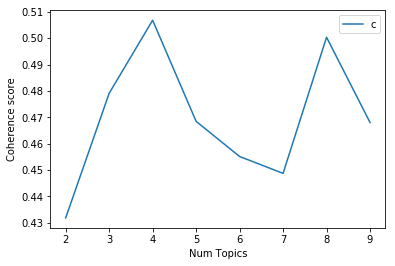

Num Topics = 2  has Coherence Value of 0.4318
Num Topics = 3  has Coherence Value of 0.4791
Num Topics = 4  has Coherence Value of 0.5068
Num Topics = 5  has Coherence Value of 0.4685
Num Topics = 6  has Coherence Value of 0.4551
Num Topics = 7  has Coherence Value of 0.4487
Num Topics = 8  has Coherence Value of 0.5003
Num Topics = 9  has Coherence Value of 0.468
coherence values computed


In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=100,update_every=1,chunksize=100,passes=20,alpha='auto',per_word_topics=True)
        # model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, limit=end,start=begin, step=1)


############################################################### Show graph
limit=end; start=begin; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('coherence.png')
plt.show()
##############################################################


#Topic models are evaluated based on their ability to describe documents well (i.e. low perplexity) 
#and to produce topics that carry coherent semantic meaning (high coherence).

#perplexity:inability to deal with or understand something complicated or unaccountable.
#coherence: the quality of forming a unified whole
#ultimate aim is to make perplexity as low as possible and coherence as high as possible
count=1
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("coherence values computed")

In [14]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
#     print("1")
    for i, row in enumerate(ldamodel[corpus]):
#         print("2")
        row = sorted(row[0], key=lambda x: (x[1]))#, reverse=True)
#         print("3")
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
#             print("4")
            if j == 0:  # => dominant topic
#                 print("5")
                wp = ldamodel.show_topic(topic_num)
#                 print("6")
                topic_keywords = ", ".join([word for word, prop in wp])
#                 print("7")
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#                 print("8")
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
#     print("9")
    # Add original text to the end of the output
    contents = pd.Series(texts)
#     print("10")
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     print("11")
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=list(df['raw_emails']))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords', 'Text']

# print("done")

df_dominant_topic.to_csv("/data-01/MFCGD.COM/mittadi/employees_office_365_spark/archive_emails/df_dominant_topic.csv",index=False)

[(0,
  '0.119*"assistant" + 0.118*"executive" + 0.112*"thank" + 0.029*"send" + '
  '0.026*"ardhi" + 0.022*"know" + 0.022*"meeting" + 0.020*"time" + '
  '0.019*"need" + 0.017*"reinafe_aurelliano"'),
 (1,
  '0.160*"email" + 0.114*"november" + 0.081*"feedback" + 0.071*"office" + '
  '0.063*"contact" + 0.056*"staff" + 0.041*"access" + 0.038*"need" + '
  '0.037*"currently" + 0.031*"tuesday"'),
 (2,
  '0.058*"team" + 0.039*"new" + 0.032*"employee" + 0.030*"year" + 0.027*"good" '
  '+ 0.026*"also" + 0.022*"work" + 0.020*"help" + 0.018*"cost" + 0.018*"day"'),
 (3,
  '0.087*"mbps" + 0.084*"description" + 0.071*"pm" + 0.046*"december" + '
  '0.043*"service" + 0.040*"gigi" + 0.038*"ms" + 0.035*"finance" + '
  '0.032*"kindly" + 0.032*"nov"')]


In [15]:
# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords,Text
0,0,1.0,0.0298,"email, november, feedback, office, contact, staff, access, need, currently, tuesday","Hello, Janell Parba has completed the Conflict of Interest Statement. Please see screen shot. [cid:imageXXXX.png@XXXXDXXXXFD4.XXXXF0] Again, we're very sorry for the inconvenience. Thanks, [cid:imageXXXX.png@XXXXD2C4BB.XXXXFXXXX]"
1,1,1.0,0.0298,"email, november, feedback, office, contact, staff, access, need, currently, tuesday","Hello Ms Bambi, I'll make sure she completes the survey first thing on Saturday. Again, apologies for the inconvenience. Thanks, [cid:imageXXXX.png@XXXXD2C4BB.XXXXFXXXX]"
2,2,1.0,0.0194,"email, november, feedback, office, contact, staff, access, need, currently, tuesday","Hello, Apologies for the incovenience this has caused. Unfortunately, Janell is on leave today and tomorrow, but I'll make sure she will complete this compliance first thing on Saturday (PHT). Thanks, [cid:imageXXXX.png@XXXXD2C4BB.XXXXFXXXX]"
3,3,1.0,0.1041,"email, november, feedback, office, contact, staff, access, need, currently, tuesday","Hi Eric, Please find the attached revised billing report for the following periods: * Aug XXXX-Sept XXXX * Sept XXXX-Oct XXXX There were no changes made for IFP PM as the previous files sent already had the correct coverage. The IFP NB billing for September-October was edited and duly approved by John Lee in a separate email to Melissa Licen. Thank you. Best Regards, Out of Office Alert: Nov 2-9, XXXX [XXXX_Corporate_English.gif]"
4,4,1.0,0.0405,"email, november, feedback, office, contact, staff, access, need, currently, tuesday","Hi Ian, Jayson Joaquin told me that the advise was given to him over the phone. Best Regards, Out of Office Alert: Nov 2-9, XXXX [XXXX_Corporate_English.gif]"
5,5,3.0,0.0493,"mbps, description, pm, december, service, gigi, ms, finance, kindly, nov","Hi Ian, I already served the NTE to the employee and am just awaiting his formal response. I have already sent for transmittal the HR copy of the document. Some questions though: * What possible reason/scenario on the employees explanation letter would prevent me from coming up with a termination decision? * By the time the employee submits his explanation letter, if he is also able to complete his pre-employment requirements on the same day, does it mean we will be compelled to retain his employment? * When I served the memo to him, he mentioned that one of his challenges in completing the requirements is because he has an NBI hit. Is that a valid reason for him to be able to request for further submission deadline extension and not be issued a termination decision? * He also informed me that Anna Krizel Nuezca informed him that its okay if he cannot submit the requirements yet and that he can still do so within the month. Will that cause a conflict if we ever issue a termination decision? I was not aware that HR Recruitment gave him that info. Looking forward to your response, thanks. Best Regards, Out of Office Alert: Nov 2-9, XXXX [XXXX_Corporate_English.gif]"
6,6,3.0,0.0174,"mbps, description, pm, december, service, gigi, ms, finance, kindly, nov","I am fully aware of the process in serving NTEs. The reason why I asked if you have already served the NTE is because: 1. I believe there are instances where HR can serve NTEs directly to employees, especially since this issue is something that violates the probationary contract of the staff, and something that was not relayed to me only until recently by the Recruitment team; 2. I was on leave and since this is an urgent matter, it should have been attended to by HR instead Anyway, attached is the drafted NTE document as well as copies of the email exchanges between the employee and HR Recruitment. Please provide your greenlight ASAP so I can serve this to the employee the soonest. Thanks. Best Regards, Out of Office Alert: [XXXX_Corporate_English.gif]"
7,7,3.0,0.0792,"mbps, description, pm, december, servi

In [16]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      41.691595  1        1       0.212952 -0.021278
2      34.704974  1        2      -0.197562 -0.334351
3      15.024949  1        3      -0.266776  0.291268
1      8.578482   1        4       0.251386  0.064361, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
278   Default  2179.000000  assistant    2179.000000  30.0000  30.0000
273   Default  2173.000000  executive    2173.000000  29.0000  29.0000
3     Default  2160.000000  thank        2160.000000  28.0000  28.0000
13    Default  604.000000   email        604.000000   27.0000  27.0000
51    Default  579.000000   mbps         579.000000   26.0000  26.0000
74    Default  429.000000   november     429.000000   25.0000  25.0000
222   Default  554.000000   description  554.000000   24.0000  24.0000
16    Default  473.000000   pm           473.000000   23.0000  23.0000
44    Default  886.000000   team         886.000000   22.0000  22.0000
72    Default  305.000000   feedback     305.000000   21.0000  21.0000
127   Default  269.000000   office       269.000000   20.0000  20.0000
118   Default  499.000000   need         499.000000   19.0000  19.0000
67    Default  590.000000   new          590.000000   18.0000  18.0000
82    Default  238.000000   contact      238.000000   17.0000  17.0000
71    Default  303.000000   december     303.000000   16.0000  16.0000
62    Default  283.000000   service      283.000000   15.0000  15.0000
43    Default  212.000000   staff        212.000000   14.0000  14.0000
25    Default  497.000000   employee     497.000000   13.0000  13.0000
134   Default  265.000000   gigi         265.000000   12.0000  12.0000
188   Default  250.000000   ms           250.000000   11.0000  11.0000
70    Default  455.000000   year         455.000000   10.0000  10.0000
162   Default  232.000000   finance      232.000000   9.0000   9.0000 
101   Default  418.000000   good         418.000000   8.0000   8.0000 
22    Default  402.000000   also         402.000000   7.0000   7.0000 
73    Default  213.000000   kindly       213.000000   6.0000   6.0000 
153   Default  210.000000   nov          210.000000   5.0000   5.0000 
130   Default  480.000000   ardhi        480.000000   4.0000   4.0000 
46    Default  154.000000   access       154.000000   3.0000   3.0000 
279   Default  197.000000   agnes_neria  197.000000   2.0000   2.0000 
126   Default  141.000000   currently    141.000000   1.0000   1.0000 
...       ...         ...           ...         ...      ...      ... 
33    Topic4   109.344428   response     110.216910   2.4480  -3.5415 
185   Topic4   100.107050   immediate    100.960144   2.4474  -3.6297 
128   Topic4   97.448120    respond      98.305878    2.4471  -3.6566 
178   Topic4   80.343403    mobile       81.194350    2.4454  -3.8497 
230   Topic4   57.348368    away         58.222162    2.4408  -4.1868 
181   Topic4   45.769017    person       46.641742    2.4370  -4.4124 
146   Topic4   38.491731    user         39.355436    2.4337  -4.5855 
135   Topic4   48.187299    happen       49.344384    2.4322  -4.3609 
136   Topic4   37.665342    laptop       38.747437    2.4276  -4.6072 
144   Topic4   25.465543    status       26.331101    2.4225  -4.9986 
294   Topic4   2.614707     checking     3.736824     2.0988  -7.2748 
125   Topic4   71.434444    concern      103.378736   2.0863  -3.9672 
231   Topic4   1.433732     gb_life      2.282476     1.9909  -7.8757 
119   Topic4   89.919029    support      144.952461   1.9784  -3.7371 
57    Topic4   68.409279    message      167.407232   1.5610  -4.0105 
258   Topic4   0.595728     hub          1.668062     1.4263  -8.7539 
281   Topic4   0.497341     regarding    1.399057     1.4216  -8.9344 
280   Topic4   0.497341     received     1.399057     1.4216  -8.9344 
272   Topic4

In [17]:
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf,grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)],axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2970,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano","Hi Sir, I just wonder if we can assign somehow who can proactively update me and GB Leaders with the progress. Zeth and Mikhi may have other responsibilities, but I do not see the sense of urgency. PDS model is not yet complete, and that's what we are waiting to be completed. I am trying my best to squeeze this in into my schedule, but it has been really challenging due to my added responsibilities. I actually missed getting in touch with them this week. Hope to get your full support on this. Thank you, Chad 3F Manulife South Building, UP Ayala Techno Hub, Commonwealth Avenue, Diliman, Quezon City XXXX [cid:imageXXXX.gif@XXXXD1C8A6.XXXXC2E7D0]"
1,0.0,0.2748,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano","Dear All, Happy New Year! :) I hope the first week of XXXX is doing well for everyone. Your registration for the first run of the NHO this January 8-9, XXXX is now confirmed! Thank you for creating a timely registration. Reminder: Our training starts at exactly 9:XXXX AM. Please inform your new hires to wait for me at the bldg. K. Lobby at least 5 minutes before time. [cid:8b5d8fXXXX-XXXXd6-XXXX-XXXX-eXXXXfXXXXfbfXXXX] NHO Batch 1 Official List of Participants: The names below are the only participants to be accommodated on Monday. [cid:XXXXf0b2b-XXXXf3-4f5f-XXXX-f1a8bf7edfac] [cid:XXXXeef0a-XXXX-XXXXe-bXXXX-abXXXXeXXXX] Should there be questions or updates, please let me know. Thank you and regards, Ma. Maika Evita E. Garcia GF, Manulife Building K, U.P North Science & Technology Park, Commonwealth Ave. Diliman, QC Telephone: (XXXX) XXXX Loc. XXXX|Email:XXXXX@XXXX.com<mailto:XXXXX@XXXX.com> $B!!(B"
2,0.0,0.2731,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano","Hi Simon, As mentioned below this is regarding the contract that is housed in MLs contracts repository. If you need any additional information the ProContracts-wiz team will be able to assist you. Also, if you need training to the database that can be arranged with the team as well. ProContracts-wiz, kindly note that Simon Yunger is the replacement for Edward Walke. I will update the tracker accordingly please update the database and provide any assistance that Simon will need. Thanks all! Vacation Alert: Dec. XXXXth Dec. XXXXst / Dec. XXXXth Jan. 3rd Jennifer Stone [cid:0__BBFXXXXDFAEXXXXBD8f9e8aXXXXdfXXXX@local]"
3,0.0,0.2501,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano","Hello Renan, I made some adjustments on the leaves I filed in workday. Given the continuous growth of the BA team I need to convert some of the training materials into Articulate in order for the new BAs to take the lecture pieces online and lessen the time I need to run classroom sessions. Here are the sessions I am converting into online format: * Operations Management * BA Fundamentals * Requirements Elicitation * Project Management for Non Project Managers Thank you. Manulife Business Processing Services Manulife Building K, UP Technohub| Commonwealth Avenue, Diliman, Quezon City XXXX"
4,0.0,0.2391,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano","Hi Linda, Hope you are doing well. As the WFA's have been trying to fix the PDS forecast and finalize by Dec 1. We are targeting to close this project out by end of the year. But we would like to hear from you as the main stakeholder: * What do you want to see as an indicator that this project is ""closed""? Next is : We will proceed with the turnover/transition to the onshore/MBPS leaders. * Training on how to use the model as moving forward tool * Come up with regular reviews to see if the teams are properly staffed * Scheduling activities [cid:imageXXXX.png@XXXXDXXXX.5C3CXXXX] Hope to hear from you soon. Thank you, Chad 3F Manulife South

In [18]:
                                            #NUMBER OF DOCUMENTS RELATED TO A TOPIC                                                
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts =pd.DataFrame({'Topics':topic_counts.index, 'Num_Documents':topic_counts.values})#converted the pandas series to a dataframe
topic_counts=topic_counts.set_index('Topics')
print(topic_counts)



# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
print(topic_contribution)


# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].reset_index(drop=True)
topic_num_keywords=topic_num_keywords.drop_duplicates()
topic_num_keywords.head()
topic_num_keywords = topic_num_keywords.set_index('Dominant_Topic')
topic_num_keywords.head()


# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1).reset_index()
df_dominant_topics.head()

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic_Id', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

        Num_Documents
Topics               
1.0     3904         
3.0     764          
2.0     114          
0.0     103          
        Num_Documents
Topics               
1.0     0.7992       
3.0     0.1564       
2.0     0.0233       
0.0     0.0211       


,Dominant_Topic_Id,Topic_Keywords,Num_Documents,Perc_Documents
0,1.0,"email, november, feedback, office, contact, staff, access, need, currently, tuesday",3904,0.7992
1,3.0,"mbps, description, pm, december, service, gigi, ms, finance, kindly, nov",764,0.1564
2,2.0,"team, new, employee, year, good, also, work, help, cost, day",114,0.0233
3,0.0,"assistant, executive, thank, send, ardhi, know, meeting, time, need, reinafe_aurelliano",103,0.0211
